<a href="https://colab.research.google.com/github/GiuliaLanzillotta/exercises/blob/master/Turning_my_sister_into_an_old_painting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turning my sister into an old painting 
This notebook will explore the magic of GANs. <br>
We are going to refer to a particular GAN architecture : the** Cycle GAN**. 

> ### The goal? <br>Taking a picture of my beautiful sister and turn it into an old painting, to see how she would have looked like a few centuries ago. 


To do this we are going to need 3 things: 
  1. A picture of my sister 
  2. An implementation of *cycle GAN* 
  3. A rich enough collection of portaits of ladies from the past

### Let's get started!

The first thing we do is (1).

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

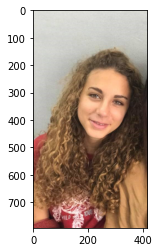

In [0]:
mysisterpic = "../mysister.jpg"
img = mpimg.imread(mysisterpic)
plt.imshow(img)

Now that (1) is done, we're going to jump to (3) before continuing to (2). 
## Building a dataset


The magic of the Cycle GAN model is that it doesn't need paired datasets. All it needs is an instance of the input set and an instance of the output set. To build the dataset we are going to download two sets of images from Google images, one with women paintings and one with actual women pictures. 

In [81]:
!git clone https://github.com/ultralytics/google-images-download

Cloning into 'google-images-download'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 710 (delta 0), reused 1 (delta 0), pack-reused 707
Receiving objects: 100% (710/710), 301.27 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (398/398), done.


In [0]:
## download the chrome driver 
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

In [0]:
%%bash 

#!/bin/bash 

# a script to download google images
cd google-images-download
#python3 bing_scraper.py --search 'Women old painting oil' --limit 200 --download --chromedriver chromedriver
python3 bing_scraper.py --search 'woman picture face photography portrait' --limit 200 --download --chromedriver chromedriver

In [0]:
paintings_folder = "google-images-download/images/Women_old_painting_oil"
pictures_folder = "google-images-download/images/woman_picture_face_photography_portrait"

In [0]:
from os import listdir
from os.path import isfile, join
paintings_files = [f for f in listdir(paintings_folder) if isfile(join(paintings_folder, f))]
pictures_files = [f for f in listdir(pictures_folder) if isfile(join(pictures_folder, f))]

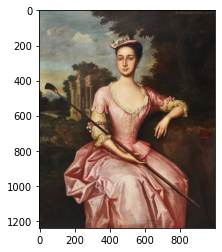

In [95]:
img = mpimg.imread(join(paintings_folder,paintings_files[5]))
plt.imshow(img)

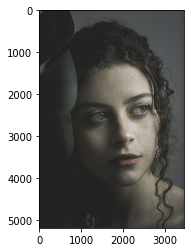

In [124]:
img = mpimg.imread(join(pictures_folder,pictures_files[130]))
plt.imshow(img)

Now that the data is actually here there's only one last step separating us from the actuall model coding. 

In [0]:
# organising the data 
validation_split = 0.2
# shuffle the indices
train_paintings_indices = ... 
test_paintings_indices = ...
train_pictures_indices = ...
test_pictures_indices = ...

In [0]:
# load images 
print("Loading training and testing data")
train_paintings = [mpimg.imread(join(paintings_folder,paintings_files[i])) for i in train_paintings_indices]
test_paintings = [mpimg.imread(join(paintings_folder,paintings_files[i])) for i in test_paintings_indices]
train_pictures = [mpimg.imread(join(pictures_folder,pictures_files[i])) for i in train_pictures_indices]
test_pictures = [mpimg.imread(join(pictures_folder,pictures_files[i])) for i in test_pictures_indices]
print("Loaded.")

## The model : Cycle GAN

We'll be using Tensorflow 2 to implement the Cycle GAN as described in [this paper](https://arxiv.org/pdf/1703.10593.pdf).

### Data preprocessing

In [0]:
import tensorflow as tf

In [0]:
img_rows, img_cols, channels = 256, 256, 3
# Normalize images to [-1, 1] and reshape
def preprocess_image(image):
    return tf.reshape(tf.cast(tf.image.resize(image, (int(img_rows), int(img_cols))), tf.float32) / 127.5 - 1, (1, img_rows, img_cols, channels))

In [0]:
print("Preprocessing ...")
train_x = train_pictures.map(preprocess_image)
train_y = train_paintings.map(preprocess_image)
test_x = test_pictures.map(preprocess_image)
test_y = test_paintings.map(preprocess_image)
print("Done.")